In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the 'gas production' csv file into a pandas DataFrame
gas_prod = pd.read_csv('../data/clean_data/Gas Production - EJ-YearFixed-Python.csv') #, index_col=0
gas_prod.head()

,Year,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,Brunei,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,0.09,0.21,0.06,NaN,0.02,NaN,NaN,NaN,0.01,...,NaN,NaN,0.03,0.39,20.57,6.75,NaN,0.31,NaN,NaN
1,1971,0.09,0.23,0.09,NaN,0.03,NaN,NaN,NaN,0.01,...,NaN,NaN,0.05,0.66,21.16,7.24,NaN,0.30,NaN,NaN
2,1972,0.12,0.22,0.13,NaN,0.04,0.02,0.04,0.01,0.02,...,NaN,NaN,0.05,0.95,21.09,7.55,NaN,0.30,NaN,NaN
3,1973,0.16,0.24,0.17,NaN,0.06,0.02,0.06,0.01,0.07,...,NaN,NaN,0.06,1.03,21.07,8.06,NaN,0.37,NaN,NaN
4,1974,0.18,0.25,0.19,NaN,0.07,0.02,0.06,0.01,0.15,...,NaN,NaN,0.06,1.24,20.14,8.89,NaN,0.39,NaN,NaN


In [3]:
# Replace all the blanks (or NaN) with zero
clean_gas_prod = gas_prod.replace(np.nan,0)
clean_gas_prod.tail()

,Year,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,Brunei,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
45,2015,2.93,1.28,2.74,0.68,0.53,0.93,0.70,0.86,0.48,...,2.37,0.68,2.11,1.46,26.65,0.0,1.93,1.30,0.37,0.10
46,2016,3.29,1.34,3.47,0.66,0.52,0.95,0.68,0.87,0.47,...,2.28,0.68,2.17,1.50,26.18,0.0,1.91,1.34,0.37,0.02
47,2017,3.35,1.34,4.06,0.64,0.52,0.96,0.66,0.98,0.46,...,2.11,0.70,2.24,1.51,26.86,0.0,1.92,1.39,0.34,0.02
48,2018,3.38,1.42,4.68,0.69,0.53,0.96,0.61,0.91,0.45,...,2.21,0.71,2.21,1.46,30.09,0.0,2.06,1.14,0.35,0.02
49,2019,3.10,1.50,5.52,0.88,0.61,1.03,0.54,0.93,0.47,...,2.27,0.71,2.25,1.43,33.15,0.0,2.03,0.95,0.35,0.02


In [4]:
# Read the 'world population' csv file into pandas
global_pop = pd.read_csv('../data/clean_data/WorldPopulationbyYear.csv')
global_pop

,Year,World Population
0,1950,2556506575
1,1951,2593857923
2,1952,2635733945
3,1953,2681061562
4,1954,2729285853
...,...,...
65,2015,7338964960
66,2016,7424282488
67,2017,7509065705
68,2018,7591932907


In [5]:
# Remove any data on years prior to 1970;
# to match up with the gas_prod data
g_pop = global_pop[(global_pop["Year"] >= 1970)]
g_pop

,Year,World Population
20,1970,3682911039
21,1971,3760509002
22,1972,3836892580
23,1973,3912347640
24,1974,3988478324
25,1975,4062864562
26,1976,4135418002
27,1977,4207766711
28,1978,4281312782
29,1979,4356746035


In [6]:
# Merge the 'gas production' with 'world population by year'
gas_pop = g_pop.merge(clean_gas_prod, on="Year")
gas_pop

,Year,World Population,Algeria,Argentina,Australia,Azerbaijan,Bahrain,Bangladesh,Bolivia,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Yemen
0,1970,3682911039,0.09,0.21,0.06,0.00,0.02,0.00,0.00,0.00,...,0.00,0.00,0.03,0.39,20.57,6.75,0.00,0.31,0.00,0.00
1,1971,3760509002,0.09,0.23,0.09,0.00,0.03,0.00,0.00,0.00,...,0.00,0.00,0.05,0.66,21.16,7.24,0.00,0.30,0.00,0.00
2,1972,3836892580,0.12,0.22,0.13,0.00,0.04,0.02,0.04,0.01,...,0.00,0.00,0.05,0.95,21.09,7.55,0.00,0.30,0.00,0.00
3,1973,3912347640,0.16,0.24,0.17,0.00,0.06,0.02,0.06,0.01,...,0.00,0.00,0.06,1.03,21.07,8.06,0.00,0.37,0.00,0.00
4,1974,3988478324,0.18,0.25,0.19,0.00,0.07,0.02,0.06,0.01,...,0.00,0.00,0.06,1.24,20.14,8.89,0.00,0.39,0.00,0.00
5,1975,4062864562,0.22,0.27,0.21,0.00,0.08,0.02,0.06,0.02,...,0.00,0.00,0.06,1.29,18.65,9.86,0.00,0.38,0.00,0.00
6,1976,4135418002,0.28,0.26,0.25,0.00,0.08,0.03,0.07,0.02,...,0.00,0.00,0.07,1.36,18.50,10.94,0.00,0.47,0.00,0.00
7,1977,4207766711,0.27,0.27,0.28,0.00,0.09,0.04,0.07,0.02,...,0.00,0.00,0.14,1.43,18.58,11.80,0.00,0.51,0.00,0.00
8,1978,4281312782,0.41,0.27,0.30,0.00,0.10,0.04,0.07,0.03,...,0.00,0.00,0.20,1.37,18.50,12.69,0.00,0.51,0.00,0.00
9,1979,4356746035,0.68,0.25,0.35,0.00,0.11,0.05,0.07,0.03,...,0.00,0.00,0.21,1.38,19.06,13.87,0.00,0.57,0.00,0.00


In [7]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = gas_pop["World Population"][10:30].values.reshape(-1, 1)
y = gas_pop["Total World"][10:30].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (20, 1) (20, 1)


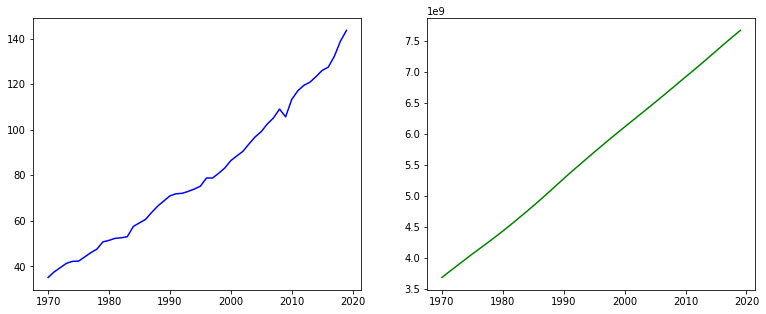

In [8]:
x = gas_pop['Year']
y1 = gas_pop['Total World']
y2 = gas_pop['World Population']

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(x, y1, color='b')
plt.subplot(132)
plt.plot(x, y2, color='g')
plt.show()

# Come back to add labels and customize ------------------------------------------------------------------------------------

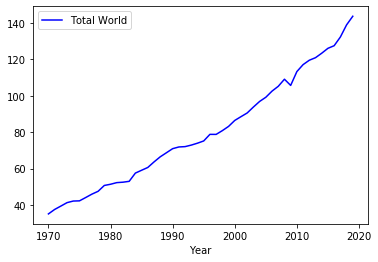

In [9]:
# Plot the data to see if a linear trend exists 
gas_pop.plot(kind ="line", color="blue", x="Year", y="Total World")

# Come back to add labels and customize ------------------------------------------------------------------------------------

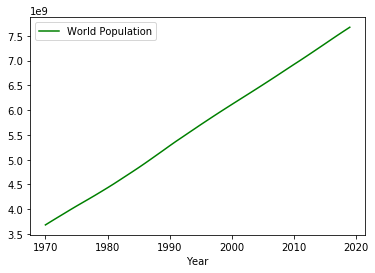

In [10]:
# Plot the data to see if a linear trend exists 
gas_pop.plot(kind="line", color="green", x="Year", y="World Population")

# Come back to add labels and customize ------------------------------------------------------------------------------------

In [11]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
### END SOLUTION

In [12]:
# Create the model

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [13]:
world_gas_2000 = gas_pop['World Population'][30].reshape(-1, 1)
world_gas_2000.shape

(1, 1)

In [14]:
exajoules_2000 = gas_pop['Total World'][30].reshape(-1, 1)
exajoules_2000.shape

(1, 1)

In [15]:
# Fit the model to the data 
from sklearn.metrics import mean_squared_error, r2_score
fitment = model.fit(X, y)

predicted = fitment.predict(world_gas_2000)

print(f"Prediction: {predicted}")
print(f"Actual: {exajoules_2000}")

### BEGIN SOLUTION
# model.fit(X_train, y_train)
### END SOLUTION

Prediction: [[84.99416557]]
Actual: [[86.44]]


In [ ]:
# Figure out a 'for loop' to make predictions for 2001-2010
# Move window one year ahead each time
predict0110 = []
actual0110 = []

for index, row in gas_pop.iterrows():

In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# from sklearn.metrics import mean_squared_error, r2_score

# ### BEGIN SOLUTION

# # Use our model to make predictions
# predicted = model.predict(X_test)

# # Score the predictions with mse and r2
# mse = mean_squared_error(y_test, predicted)
# r2 = r2_score(y_test, predicted)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")
# print(f"Prediction: {predicted}")

### END SOLUTION

In [ ]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
# model.score(X_test, y_test)
### END SOLUTION

In [16]:
# --------------- Divider between GAS PRODUCTION & GAS CONSUMPTION ---------------

In [17]:
# Read the 'gas consumption' csv file into a DataFrame
gas_csmp = pd.read_csv('../data/clean_data/Gas Consumption - EJ-YearFixed-Python.csv') # , index_col=0
gas_csmp.head()

,Year,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,0.03,0.15,NaN,0.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.03,14.97,4.38,NaN,0.27,NaN,NaN
1,1966,0.03,0.16,NaN,0.07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.03,16.14,4.89,NaN,0.28,NaN,0.01
2,1967,0.03,0.17,NaN,0.06,NaN,NaN,NaN,0.02,NaN,...,NaN,NaN,0.02,0.05,17.04,5.38,NaN,0.31,NaN,0.01
3,1968,0.03,0.19,NaN,0.07,NaN,NaN,NaN,0.04,NaN,...,NaN,NaN,0.02,0.11,18.24,5.81,NaN,0.32,NaN,0.01
4,1969,0.04,0.19,0.01,0.08,NaN,NaN,NaN,0.09,NaN,...,NaN,NaN,0.02,0.22,19.63,6.21,NaN,0.33,NaN,NaN


In [18]:
# Replace all the blanks (or NaN) with zero
clean_gas_csmp = gas_csmp.replace(np.nan,0)
clean_gas_csmp.tail()

,Year,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
50,2015,1.37,1.68,1.52,0.29,0.40,0.93,0.64,0.57,1.55,...,0.91,1.15,2.58,2.59,26.77,0.0,1.67,1.33,0.37,0.86
51,2016,1.39,1.74,1.50,0.30,0.39,0.95,0.64,0.58,1.34,...,0.90,1.13,2.62,2.90,26.97,0.0,1.56,1.34,0.37,0.76
52,2017,1.42,1.74,1.48,0.33,0.38,0.96,0.66,0.59,1.35,...,0.89,1.09,2.69,2.83,26.64,0.0,1.55,1.39,0.34,0.79
53,2018,1.56,1.75,1.49,0.31,0.39,0.99,0.70,0.61,1.29,...,1.02,1.10,2.68,2.85,29.52,0.0,1.60,1.14,0.35,0.84
54,2019,1.63,1.71,1.93,0.32,0.42,1.24,0.69,0.63,1.29,...,1.14,1.02,2.74,2.84,30.48,0.0,1.56,0.95,0.35,0.86


In [19]:
# Merge the 'gas consumption' with 'world population by year'
gas_pop2 = g_pop.merge(clean_gas_csmp, on="Year")
gas_pop2

,Year,World Population,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1970,3682911039,0.04,0.21,0.06,0.10,0.00,0.00,0.00,0.14,...,0.00,0.00,0.03,0.43,20.70,6.82,0.00,0.31,0.00,0.00
1,1971,3760509002,0.04,0.23,0.09,0.12,0.00,0.00,0.00,0.20,...,0.00,0.00,0.05,0.69,21.34,7.46,0.00,0.30,0.00,0.01
2,1972,3836892580,0.05,0.26,0.13,0.13,0.00,0.02,0.00,0.25,...,0.00,0.00,0.05,0.97,21.55,7.84,0.00,0.30,0.00,0.01
3,1973,3912347640,0.06,0.29,0.17,0.14,0.00,0.02,0.00,0.30,...,0.00,0.00,0.06,1.05,21.38,8.53,0.00,0.37,0.00,0.01
4,1974,3988478324,0.07,0.31,0.19,0.15,0.00,0.02,0.00,0.35,...,0.00,0.00,0.06,1.26,20.64,9.04,0.00,0.39,0.00,0.01
5,1975,4062864562,0.10,0.32,0.21,0.15,0.00,0.02,0.00,0.35,...,0.00,0.00,0.06,1.32,18.94,9.87,0.00,0.38,0.00,0.01
6,1976,4135418002,0.12,0.35,0.25,0.17,0.00,0.03,0.00,0.37,...,0.00,0.00,0.07,1.40,19.32,10.86,0.00,0.47,0.00,0.02
7,1977,4207766711,0.13,0.37,0.28,0.17,0.00,0.04,0.00,0.36,...,0.00,0.00,0.12,1.49,18.93,11.64,0.00,0.51,0.00,0.03
8,1978,4281312782,0.21,0.36,0.30,0.18,0.00,0.04,0.00,0.36,...,0.00,0.00,0.14,1.54,18.99,12.41,0.00,0.51,0.00,0.04
9,1979,4356746035,0.29,0.37,0.35,0.18,0.00,0.05,0.00,0.39,...,0.00,0.00,0.15,1.69,19.62,13.17,0.00,0.57,0.00,0.05


In [20]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = gas_pop2["World Population"][10:30].values.reshape(-1, 1)
y = gas_pop2["Total World"][10:30].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (20, 1) (20, 1)


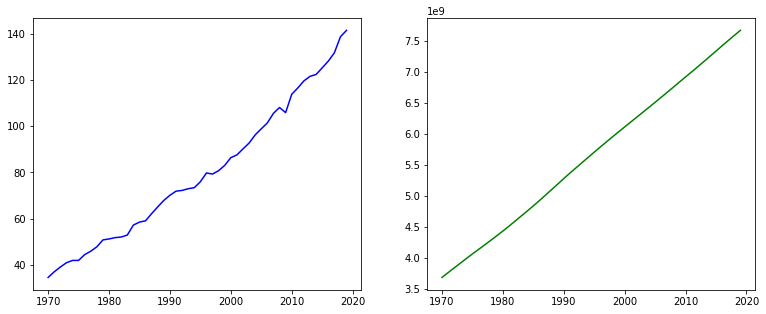

In [21]:
x = gas_pop2['Year']
y1 = gas_pop2['Total World']
y2 = gas_pop2['World Population']

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(x, y1, color='b')
plt.subplot(132)
plt.plot(x, y2, color='g')
plt.show()

# Come back to add labels and customize ------------------------------------------------------------------------------------

In [22]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
### END SOLUTION

In [23]:
# Create the model

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [24]:
world_gas_2000 = gas_pop2['World Population'][30].reshape(-1, 1)
world_gas_2000.shape

(1, 1)

In [25]:
exajoules_2000 = gas_pop['Total World'][30].reshape(-1, 1)
exajoules_2000.shape

(1, 1)

In [26]:
# Fit the model to the data 
from sklearn.metrics import mean_squared_error, r2_score
fitment = model.fit(X, y)

predicted = fitment.predict(world_gas_2000)

print(f"Prediction: {predicted}")
print(f"Actual: {exajoules_2000}")

### BEGIN SOLUTION
# model.fit(X_train, y_train)
### END SOLUTION

Prediction: [[85.26629418]]
Actual: [[86.44]]


In [ ]:
# Figure out a 'for loop' to make predictions for 2001-2010
# Move window one year ahead each time
predict0110 = []
actual0110 = []

for index, row in gas_pop2.iterrows():